**DATA PREPARATIONS**

In [10]:
import pandas as pd
# Data diambil dari kaggel

url = '/content/drive/MyDrive/Proj TS London Bike Sharing/london_merged.csv'
bike = pd.read_csv(url, parse_dates=['timestamp'], index_col='timestamp')

In [12]:
bike.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Parameter parse_date akan mengubah format waktu menjadi format kolom pada dataframe. Hal ini dilakukan agar format waktu dapat dimanipulasi dengan mudah.

Selanjutnya kita dapat melakukan checking data, untuk menentukan apakah di dalam dataframe terdapat error atau nilai null.

In [13]:
bike.isna().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Dengan menggunakan kombinasi parameter isnull() dan sum() maka dataframe akan menghitung jumlah data yang memiliki nilai null.

Kita tambahkan kolom baru dengan datanya nanti akan berhubungan dengan waktu, contoh data yang akan kita tampung adalah data jam, hari, bulan, dan tahun.

Pada data timestamp yang tadi telah di buat, kita dapat mengambil data waktu tertentu seperti jam, hari, bulan, atau tahun. Nilai yang di ambil kita masukan Kembali ke dalam dataframe dalam bentuk kolom.


In [14]:
# Menambah kolom baru
bike['hour'] = bike.index.hour
bike['day_of_week'] = bike.index.dayofweek
bike['day_of_month'] = bike.index.day
bike['month'] = bike.index.month

In [15]:
bike.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


**EXPLORATORY DATA**

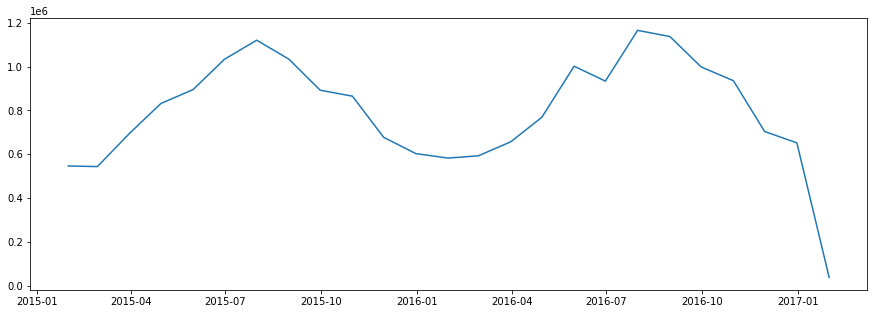

In [17]:
import matplotlib.pyplot as plt

bike_by_month = bike.resample('M').sum()

time = bike_by_month.index.values
test = bike_by_month['cnt'].values

plt.figure(figsize=(15,5))
plt.plot(time, test)